# 📌 Extracción

In [3]:
#Importando las librerías necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Extracción de datos

In [4]:
#Importando los datos a partir de la api
pd.set_option('display.max_columns',None)
df_json_telecomx = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json')

In [5]:
#Echamos un vistazo al JSON
df_json_telecomx.head(3)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [6]:
#Normalizamos las columnas que lo requieren
cliente = pd.json_normalize(df_json_telecomx['customer'])
telefono = pd.json_normalize(df_json_telecomx['phone'])
internet = pd.json_normalize(df_json_telecomx['internet'])
cuenta = pd.json_normalize(df_json_telecomx['account'])
clienteid = df_json_telecomx['customerID']
cancelacion = df_json_telecomx['Churn']

In [7]:
#Concatenando los datos normalizados
df_telecomx = pd.concat([clienteid, cancelacion, cliente, telefono, internet, cuenta], axis=1)

In [8]:
#Verificación de los datos normalizados
df_telecomx.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Conociendo el conjunto de datos

In [9]:
#Analizando los tipos de datos del json
df_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## Comprobación de incoherencias en los datos

In [10]:
# Comprobar la existencia de registros duplicados
datos_duplicados = df_telecomx[df_telecomx.duplicated()]
datos_duplicados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [11]:
print(pd.unique(df_telecomx['Churn']))
print(pd.unique(df_telecomx['SeniorCitizen']))
print(pd.unique(df_telecomx['Partner']))
print(pd.unique(df_telecomx['Dependents']))
print(pd.unique(df_telecomx['PhoneService']))
print(pd.unique(df_telecomx['MultipleLines']))
print(pd.unique(df_telecomx['OnlineSecurity']))
print(pd.unique(df_telecomx['OnlineBackup']))
print(pd.unique(df_telecomx['DeviceProtection']))
print(pd.unique(df_telecomx['TechSupport']))
print(pd.unique(df_telecomx['StreamingTV']))
print(pd.unique(df_telecomx['StreamingMovies']))
print(pd.unique(df_telecomx['PaperlessBilling']))

['No' 'Yes' '']
[0 1]
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes' 'No phone service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No']


### Inconsistencias encontradas:
1) Valores vacíos en la columna 'Churn'
2) 'SeniorCitizen' fue manejado con valores enteros, mientras que el resto de columnas con "Si" y "No", son cadenas.
3) No hay registros duplicados
4) 'Charges.Total' debería ser un 'float', no 'object'.
5) Se puede traducir al español para  mejor comprensión del dataset

# 🔧 Transformación

## Manejo de inconsistencias

### 1) Valores vacíos en la columna 'Churn'

In [12]:
#Cambiando las cadenas vacías en la columna 'Churn' por nan
df_telecomx['Churn'] = df_telecomx['Churn'].replace('',np.nan)

In [13]:
#Eliminando los registros sin valor en Churn (Es el dato principal a analizar para este caso)
df_telecomx = df_telecomx.dropna()

In [14]:
#Comprobando los valores existentes para la columna 'Churn'
pd.unique(df_telecomx['Churn'])

array(['No', 'Yes'], dtype=object)

In [15]:
#Comprobando el tamaño del dataframe
df_telecomx.shape

(7043, 21)

### 2) 'SeniorCitizen' fue manejado con valores booleanos, mientras que el resto de columnas con "Si" y "No", son cadenas.

Decidí que para manejar las inconsistencias en el punto 2, lo más conveniente (para análisis de datos), era estandarizar los demás campos que venían como "Yes" y "No" en int

In [16]:
#Definimos las columnas donde vamos a convertir los 'Yes' y 'No' en 1 y 0
columnas_yn = ['Churn',
'SeniorCitizen',
'Partner',
'Dependents',
'PhoneService',
'MultipleLines',
'OnlineSecurity',
'OnlineBackup',
'DeviceProtection',
'TechSupport',
'StreamingTV',
'StreamingMovies',
'PaperlessBilling']

In [17]:
#Creamos una función para cambiar sus valores de 'Si' a 1 y de 'No' a 0.
for columna in columnas_yn:
    df_telecomx[columna] = [1 if x == 'Yes' or x == 1 else (0 if x == 'No' or x == 0 else 2) for x in df_telecomx[columna]]

# Verificación
for columna in columnas_yn:
    print(f"{columna}: {df_telecomx[columna].unique()}")

Churn: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [1 0]
PhoneService: [1 0]
MultipleLines: [0 1 2]
OnlineSecurity: [0 1 2]
OnlineBackup: [1 0 2]
DeviceProtection: [0 1 2]
TechSupport: [1 0 2]
StreamingTV: [1 0 2]
StreamingMovies: [0 1 2]
PaperlessBilling: [1 0]


In [18]:
#El campo de género de los clientes está en inglés, lo traducimos al español
#df_telecomx['gender'] = ['Masculino' if x == 'Male' 'Femenino' elif x == 'Female' for x in df_telecomx['gender']]



In [19]:
#Comprobando diferentes resultados de la columna 'gender'
df_telecomx['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [20]:
#Traduciendo la columna 'gender'
df_telecomx['gender'] = ['Masculino' if x == 'Male' else 'Femenino' for x in df_telecomx['gender']]

In [21]:
#Verificando los cambios
df_telecomx['gender'].unique()

array(['Femenino', 'Masculino'], dtype=object)

In [22]:
#Revisando los posibles valore de columnas que también se encuentran en inglés
print(df_telecomx['InternetService'].unique())
print(df_telecomx['Contract'].unique())
print(df_telecomx['PaymentMethod'].unique())

['DSL' 'Fiber optic' 'No']
['One year' 'Month-to-month' 'Two year']
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [23]:
#Traduciendo estas columnas
df_telecomx['InternetService'] = df_telecomx['InternetService'].map({'DSL': 'DSL', 'Fiber optic': 'Fibra óptica', 'No':'No'})
df_telecomx['Contract'] = df_telecomx['Contract'].map({'One year': 'Anual', 'Month-to-month': 'Mensual', 'Two year': 'Bienal'})
df_telecomx['PaymentMethod'] = df_telecomx['PaymentMethod'].map({'Mailed check': 'Cheque', 'Electronic check': 'Cheque electrónico', 'Credit card (automatic)':'TDC',
 'Bank transfer (automatic)':'Tranferencia electrónica'})

In [24]:
#Verificamos el dataframe
df_telecomx.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,0,1,0,1,1,0,Anual,1,Cheque,65.6,593.3
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Mensual,0,Cheque,59.9,542.4
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra óptica,0,0,1,0,0,0,Mensual,1,Cheque electrónico,73.9,280.85


In [25]:
#Definimos las columnas que vamos a convertir en int
columnas_a_int = ['Churn',
'SeniorCitizen',
'Partner',
'Dependents',
'PhoneService',
'MultipleLines',
'OnlineSecurity',
'OnlineBackup',
'DeviceProtection',
'TechSupport',
'StreamingTV',
'StreamingMovies',
'PaperlessBilling']

In [26]:
#Verificando el tipo de valores en las columnas
for x in columnas_a_int:
    print(df_telecomx[x].dtype)

int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64


### 4) 'Charges.Total' debería ser un 'float', no 'object'.

In [27]:
#Convirtiendo 'Charges.Total' a float
df_telecomx['Charges.Total'] = pd.to_numeric(df_telecomx['Charges.Total'], errors='coerce')

In [28]:
#Verificando el tipo de dato en 'Charges.Total'
df_telecomx['Charges.Total'].dtype

dtype('float64')

### 5) Se puede traducir al español para  mejor comprensión del dataset

In [29]:
#Creando diccionario para traducir los encabezados de las columnas

df_telecomx.rename(columns={
    "customerID": "id_cliente",
    "Churn": "cancelacion",
    "gender": "genero",
    "SeniorCitizen": "adulto_mayor",
    "Partner": "tiene_pareja",
    "Dependents": "tiene_dependientes",
    "tenure": "antiguedad",
    "PhoneService": "servicio_de_telefono",
    "MultipleLines": "lineas_multiples",
    "InternetService": "servicio_internet",
    "OnlineSecurity": "seguridad_en_linea",
    "OnlineBackup": "respaldo_en_linea",
    "DeviceProtection": "proteccion_dispositivo",
    "TechSupport": "soporte_tecnico",
    "StreamingTV": "streaming_tv",
    "StreamingMovies": "streaming_peliculas",
    "Contract": "periodicidad_de_contrato",
    "PaperlessBilling": "factura_electronica",
    "PaymentMethod": "forma_de_pago",
    "Charges.Monthly": "cargos_mensuales",
    "Charges.Total": "cargos_totales",
}, inplace=True)

## Columna de cuentas diarias

In [30]:
#Creando la nueva columna que representa los cargos diarios que se le hacen al cliente
df_telecomx['cargos_diarios'] = df_telecomx['cargos_mensuales'] / 30.44

In [31]:
df_telecomx.head(3)

,id_cliente,cancelacion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,antiguedad,servicio_de_telefono,lineas_multiples,servicio_internet,seguridad_en_linea,respaldo_en_linea,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,periodicidad_de_contrato,factura_electronica,forma_de_pago,cargos_mensuales,cargos_totales,cargos_diarios
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,0,1,0,1,1,0,Anual,1,Cheque,65.6,593.30,2.155059
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Mensual,0,Cheque,59.9,542.40,1.967806
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra óptica,0,0,1,0,0,0,Mensual,1,Cheque electrónico,73.9,280.85,2.427727


# 📊 Carga y análisis

## Análisis Descriptivo

In [32]:
#Análisis exploratorio de los datos. Incluimos solo las columnas que no tienen datos booleanos.
columnas_descritas = ['antiguedad', 'cargos_mensuales', 'cargos_totales', 'cargos_diarios']
df_telecomx[columnas_descritas].describe()

,antiguedad,cargos_mensuales,cargos_totales,cargos_diarios
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,2.127519
std,24.559481,30.090047,2266.771362,0.988504
min,0.000000,18.250000,18.800000,0.599540
25%,9.000000,35.500000,401.450000,1.166229
50%,29.000000,70.350000,1397.475000,2.311104
75%,55.000000,89.850000,3794.737500,2.951708
max,72.000000,118.750000,8684.800000,3.901117


In [33]:
#Revisando el promedio de las columnas de cargos 
promedio_cmensuales = df_telecomx['cargos_mensuales'].mean()
promedio_ctotales = df_telecomx['cargos_totales'].mean()
promedio_cdiarios = df_telecomx['cargos_diarios'].mean()

print(f'El promedio de los cargos mensuales es de: ${promedio_cmensuales:.2f}')
print(f'El promedio de los cargos totales es de: ${promedio_ctotales:.2f}')
print(f'El promedio de los cargos diarios es de: ${promedio_cdiarios:.2f}')

El promedio de los cargos mensuales es de: $64.76
El promedio de los cargos totales es de: $2283.30
El promedio de los cargos diarios es de: $2.13


In [34]:
#Revisando la mediana de las columnas de cargos 
mediana_cmensuales = df_telecomx['cargos_mensuales'].median()
mediana_ctotales = df_telecomx['cargos_totales'].median()
mediana_cdiarios = df_telecomx['cargos_diarios'].median()

print(f'La mediana de los cargos mensuales es de: ${mediana_cmensuales:.2f}')
print(f'La mediana de los cargos totales es de: ${mediana_ctotales:.2f}')
print(f'La mediana de los cargos diarios es de: ${mediana_cdiarios:.2f}')

La mediana de los cargos mensuales es de: $70.35
La mediana de los cargos totales es de: $1397.47
La mediana de los cargos diarios es de: $2.31


In [35]:
#Revisando el desviación estándar de las columnas de cargos 
desvest_cmensuales = df_telecomx['cargos_mensuales'].std()
desvest_ctotales = df_telecomx['cargos_totales'].std()
desvest_cdiarios = df_telecomx['cargos_diarios'].std()

print(f'La desviación estándar de los cargos mensuales es de: ${desvest_cmensuales:.2f}')
print(f'La desviación estándar de los cargos totales es de: ${desvest_ctotales:.2f}')
print(f'La desviación estándar de los cargos diarios es de: ${desvest_cdiarios:.2f}')

La desviación estándar de los cargos mensuales es de: $30.09
La desviación estándar de los cargos totales es de: $2266.77
La desviación estándar de los cargos diarios es de: $0.99


In [36]:
#Calculando los porcentajes de las diferentes variables booleanas.
porcentajes = []
porcentajes.append(len(df_telecomx[df_telecomx['genero']=='Masculino'])/len(df_telecomx['genero'])*100)
porcentajes.append(len(df_telecomx[df_telecomx['genero']=='Femenino'])/len(df_telecomx['genero'])*100)

#Función que calcula el porcentaje de la categoría
def porcentaje_categoria(categoria):
    return len(df_telecomx[df_telecomx[categoria]==1])/len(df_telecomx[categoria])*100


columnas_binarias = ['adulto_mayor', "tiene_pareja", "tiene_dependientes", "servicio_de_telefono", "lineas_multiples", "seguridad_en_linea", 
                     "respaldo_en_linea", "proteccion_dispositivo", "soporte_tecnico", "streaming_tv", "streaming_peliculas", "factura_electronica"]

for columna in columnas_binarias:
    porcentajes.append(porcentaje_categoria(columna))

In [37]:
print(f'El porcentaje de clientes masculinos es de {porcentajes[0]:.2f}% y de femeninos es {porcentajes[1]:.2f}%')
print(f'El porcentaje de clientes que son adultos mayores es de {porcentajes[2]:.2f}%')
print(f'El porcentaje de clientes con pareja es de {porcentajes[3]:.2f}%')
print(f'El porcentaje de clientes con dependientes es de {porcentajes[4]:.2f}%')
print(f'El porcentaje de clientes con servicio de teléfono es de {porcentajes[5]:.2f}%')
print(f'El porcentaje de clientes con múltiples líneas es de {porcentajes[6]:.2f}%')
print(f'El porcentaje de clientes con seguridad en línea es de {porcentajes[7]:.2f}%')
print(f'El porcentaje de clientes con respaldo en línea es de {porcentajes[8]:.2f}%')
print(f'El porcentaje de clientes con protección de dispositivos es de {porcentajes[9]:.2f}%')
print(f'El porcentaje de clientes con soporte técnico es de {porcentajes[10]:.2f}%')
print(f'El porcentaje de clientes con servicio de streaming de televisión es de {porcentajes[11]:.2f}%')
print(f'El porcentaje de clientes con servicio de streaming de películas es de {porcentajes[12]:.2f}%')
print(f'El porcentaje de clientes con factura electrónica es de {porcentajes[13]:.2f}%')

El porcentaje de clientes masculinos es de 50.48% y de femeninos es 49.52%
El porcentaje de clientes que son adultos mayores es de 16.21%
El porcentaje de clientes con pareja es de 48.30%
El porcentaje de clientes con dependientes es de 29.96%
El porcentaje de clientes con servicio de teléfono es de 90.32%
El porcentaje de clientes con múltiples líneas es de 42.18%
El porcentaje de clientes con seguridad en línea es de 28.67%
El porcentaje de clientes con respaldo en línea es de 34.49%
El porcentaje de clientes con protección de dispositivos es de 34.39%
El porcentaje de clientes con soporte técnico es de 29.02%
El porcentaje de clientes con servicio de streaming de televisión es de 38.44%
El porcentaje de clientes con servicio de streaming de películas es de 38.79%
El porcentaje de clientes con factura electrónica es de 59.22%


In [38]:
cantidad_cancelada = df_telecomx['cancelacion'].value_counts()

In [39]:
#Función graficadora
def grafica_cancelaciones(datos, ax, titulo):
    plt.pie(datos, colors = ['#5975A4', "#DB5461"], labels = ['Cliente vigente', 'Cancelado'], autopct= lambda x: '{:.0f}'.format(x*datos.sum()/100))
    plt.title(titulo, fontsize = 16)

grafica_cancelaciones(cantidad_cancelada, g1, 'Distribución de cancelación de clientes')

NameError: name 'g1' is not defined

In [ ]:
hombres = df_telecomx[df_telecomx['genero'] == 'Masculino']['cancelacion'].value_counts()
mujeres = df_telecomx[df_telecomx['genero'] == 'Femenino']['cancelacion'].value_counts()

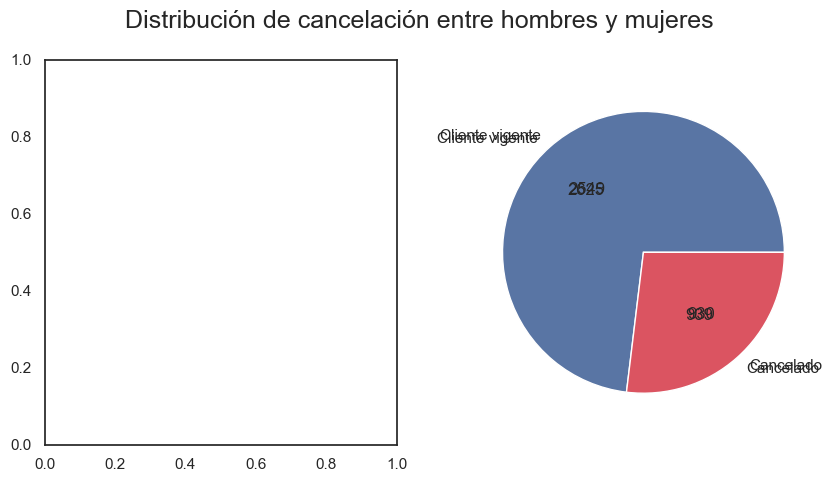

In [ ]:

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
plt.suptitle("Distribución de cancelación entre hombres y mujeres", fontsize = 18)
fig.add_subplotplt.pie(hombres, colors = ['#5975A4', "#DB5461"], labels = ['Cliente vigente', 'Cancelado'], autopct= lambda x: '{:.0f}'.format(x*hombres.sum()/100))
ax[1] = plt.pie(mujeres, colors = ['#5975A4', "#DB5461"], labels = ['Cliente vigente', 'Cancelado'], autopct= lambda x: '{:.0f}'.format(x*mujeres.sum()/100))

plt.show()




In [40]:
df_telecomx.to_csv('df_telecomx.csv')

# 📄Informe final

## Conclusiones

Aquí estarán las conclusiones al terminar el análisis.

Pendientes: Gráficas adicionales, gráficas de barras, histogramas.

**Nota: Cargar las cosas al repositorio constantemente, que si no se pierde la conexión y pierdes 10 horas de trabajo.**